In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam

In [15]:
N = 100
X = np.random.random(N) * 6 -3
y = 0.5 * X - 1 + np.random.randn(N) * 0.5

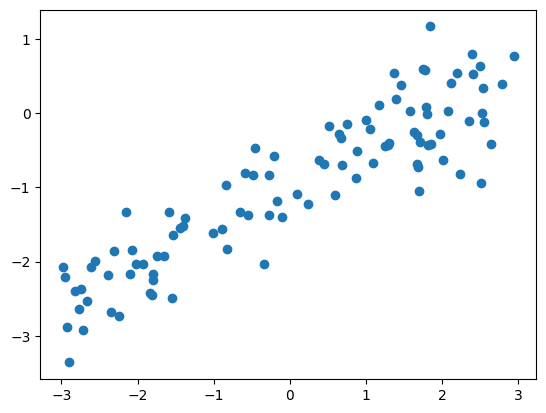

In [16]:
plt.scatter(X, y)

In [17]:
# build model
i = Input(shape=(1,))
x = Dense(1)(i)

model = Model(i, x)

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
    loss="mse",
    # optimizer="adam",
    optimizer=Adam(learning_rate=0.1),
    metrics=["mae"]
)

In [20]:
r = model.fit(
    X.reshape(-1, 1), y,
    epochs=200,
    batch_size=32,
)

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 6.2466 - mae: 2.0873
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 2.9587 - mae: 1.4310
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0896 - mae: 0.8706
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3755 - mae: 0.4921
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2821 - mae: 0.4303
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4330 - mae: 0.5411
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5190 - mae: 0.5965
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4790 - mae: 0.5698
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3636 - mae: 0.4892
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2476 - mae: 0.3990
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1968 

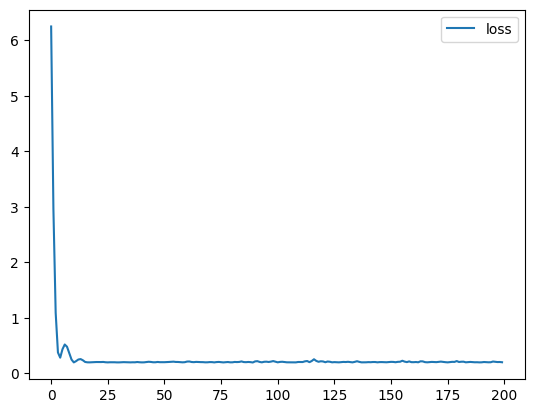

In [21]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.legend();

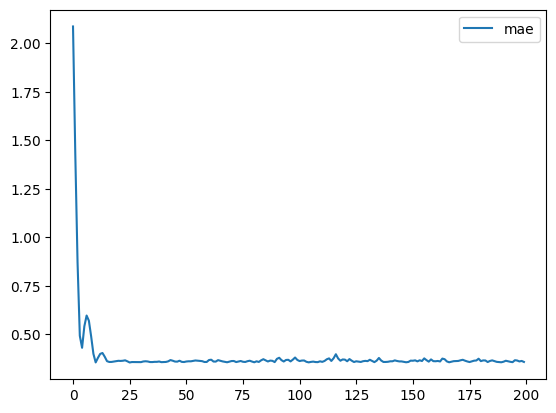

In [23]:
# Plot mae per iteration
plt.plot(r.history["mae"], label="mae")
plt.legend();

In [24]:
# Make predictions
Xtest = np.linspace(-3, 3, 20).reshape(-1, 1)
ptest = model.predict(Xtest)

1/1 [==============================] - 0s 146ms/step


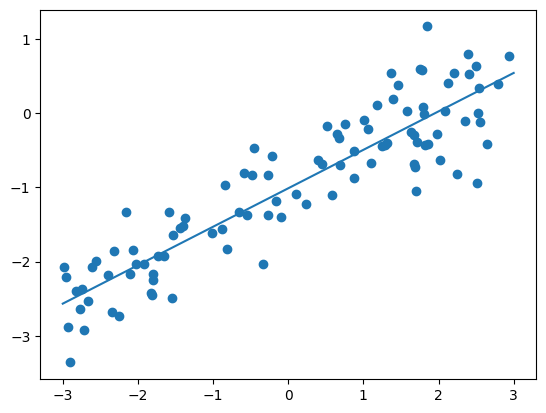

In [27]:
plt.scatter(X, y)
plt.plot(Xtest, ptest);

In [28]:
# Check the learned paramteres
model.layers

In [29]:
model.layers[1].get_weights()

[array([[0.5186088]], dtype=float32), array([-1.0109049], dtype=float32)]